In [52]:
import numpy as np
import pandas as pd

In [53]:
data = pd.read_csv('../Data/mens-machine-learning-competition-2019/DataFiles/RegularSeasonDetailedResults.csv',sep=',')
#stats = data 
#wins = stats[stats.WTeamID == 1104]
#losses = stats[stats.LTeamID == 1104]
#stats = wins.append(losses)
#stats = stats.sort_values(by=['DayNum'])
all_seasons = data
#stats = data 


In [54]:
labels = ['Score','FGM','FGA','FGM3','FGA3','FTM','FTA','OR','DR','Ast','TO','Stl','Blk','PF','GP']
def set_totals():
    totals = {}
    # [GP, Score, FGM, FGA, FGM3, FGA3, FTM, FTA, OR, DR, Ast, TO, Stl, Blk, PF]
    for i in range(1101,1467):
        t = {}
        t['Wins'] = 0
        t['Losses'] = 0
        for l in labels:
            t[l] = 0
        totals[i] = t
    return totals

In [85]:
cols = ['Winner','Team1','Team2']
for t in ["t1_","t2_"]:
    for l in labels:
        cols.append(t+l)
len(cols)
print(cols)

['Winner', 'Team1', 'Team2', 't1_Score', 't1_FGM', 't1_FGA', 't1_FGM3', 't1_FGA3', 't1_FTM', 't1_FTA', 't1_OR', 't1_DR', 't1_Ast', 't1_TO', 't1_Stl', 't1_Blk', 't1_PF', 't1_GP', 't2_Score', 't2_FGM', 't2_FGA', 't2_FGM3', 't2_FGA3', 't2_FTM', 't2_FTA', 't2_OR', 't2_DR', 't2_Ast', 't2_TO', 't2_Stl', 't2_Blk', 't2_PF', 't2_GP']


In [56]:
games = pd.DataFrame(columns=cols)
for s in range(2003,2019):
    stats = all_seasons[all_seasons.Season == s]
    totals = set_totals()
    for index, row in stats.iterrows():
        teams = [row['WTeamID'],row['LTeamID']]
        # fill in predicitive stats for current game
        # update totals dictionary, for dynamic programming
        vector = [row["WTeamID"],row["WTeamID"],row["LTeamID"]]
        winner = True
        for team in teams:
            t = "t1"
            letter = 'W'
            if winner == False:
                totals[team]['Losses'] += 1
                letter = 'L'
                t = "t2"
            else:
                totals[team]['Wins'] += 1
            for l in labels:
                if (l == 'GP'):
                    vector.append(totals[team]['GP'])
                    totals[team]['GP'] += 1
                else:
                    vector.append(float(totals[team][l]) / max(totals[team]['GP'],1))
                    totals[team][l] += row[letter+l]
            winner = False
        games.loc[index] = vector
games

,Winner,Team1,Team2,t1_Score,t1_FGM,t1_FGA,t1_FGM3,t1_FGA3,t1_FTM,t1_FTA,...,t2_FTM,t2_FTA,t2_OR,t2_DR,t2_Ast,t2_TO,t2_Stl,t2_Blk,t2_PF,t2_GP
0,1104.0,1104.0,1328.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,1272.0,1272.0,1393.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1266.0,1266.0,1437.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,1296.0,1296.0,1457.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,1400.0,1400.0,1208.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,1458.0,1458.0,1186.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,1161.0,1161.0,1236.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
7,1186.0,1186.0,1457.0,55.000000,20.000000,46.000000,3.000000,11.000000,12.000000,17.000000,...,8.000000,15.000000,17.000000,20.000000,9.000000,19.000000,4.000000,3.000000,23.000000,1.0
8,1194.0,1194.0,1156.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,1458.0,1458.0,1296.0,81.000000,26.000000,57.000000,6.000000,12.000000,23.000000,27.000000,...,17.000000,31.000000,6.000000,19.000000,11.000000,12.000000,14.000000,2.000000,18.000000,1.0


In [57]:
games.shape

(82041, 33)

In [58]:
game_vecs = games[(games.t1_GP >= 10) & (games.t2_GP >= 10)]
game_vecs.shape

(52535, 33)

In [59]:
game_vecs = game_vecs.drop(columns=["Team1","Team2",'t1_GP','t2_GP'])

In [60]:
game_vecs["Winner"] = 1

In [67]:
import random
random.seed(0)
regular = game_vecs.as_matrix()
#inverted = regular.copy()
#inverted[:,0] = 0
#inverted[:,range(1,15)] = regular[:,range(15,29)]
#inverted[:,range(15,29)] = regular[:,range(1,15)]
#model_ready_data = np.concatenate((regular,inverted))
#model_ready_data.shape
for game in regular:
    flip = random.choice([True, False])
    if flip:
        game[0] = 0
        temp = game[range(1,15)]
        game[range(1,15)] = game[range(15,29)]
        game[range(15,29)] = temp
model_ready_data = regular
model_ready_data

/Users/admin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 1.        , 64.81818182, 23.63636364, ...,  9.8       ,
         2.6       , 19.7       ],
       [ 1.        , 78.6       , 29.3       , ...,  6.4       ,
         2.8       , 19.        ],
       [ 0.        , 79.63636364, 26.        , ...,  6.2       ,
         3.2       , 18.        ],
       ...,
       [ 1.        , 74.41935484, 26.4516129 , ...,  6.90625   ,
         4.03125   , 18.4375    ],
       [ 1.        , 76.72727273, 27.12121212, ...,  6.375     ,
         4.53125   , 19.53125   ],
       [ 1.        , 75.96666667, 27.1       , ...,  5.20689655,
         3.86206897, 17.79310345]])

In [69]:
np.mean(model_ready_data[:,0])

0.4967735795184163

In [71]:
model_ready_data[0]

array([ 1.        , 64.81818182, 23.63636364, 52.90909091,  5.72727273,
       15.45454545, 11.81818182, 18.36363636, 11.18181818, 23.54545455,
       11.54545455, 20.90909091,  7.        ,  4.27272727, 18.36363636,
       60.6       , 20.8       , 51.9       ,  4.1       , 11.7       ,
       14.9       , 24.1       , 12.9       , 22.4       ,  9.7       ,
       19.        ,  9.8       ,  2.6       , 19.7       ])

In [72]:
np.savetxt("model_ready_small.csv", model_ready_data, delimiter=",")

In [73]:
model_ready_data.shape

(52535, 29)

In [74]:
targets = model_ready_data[:,0]
attrs = model_ready_data[:,range(1,29)]

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(attrs, targets, test_size=0.2, random_state=42)


In [95]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
predictions = rf_model.predict(X_test)
predictions

array([1., 0., 1., ..., 1., 0., 1.])

In [97]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.6423336823070334

In [98]:
fi = rf_model.feature_importances_
print(fi)

[0.04903043 0.0418245  0.0355021  0.02996419 0.02987767 0.03236865
 0.03084419 0.03149793 0.03498097 0.04077698 0.04220654 0.03380324
 0.03380153 0.03477863 0.04559863 0.04239912 0.03575211 0.03028426
 0.02996743 0.03178504 0.03002191 0.03116182 0.03600182 0.04099614
 0.04088321 0.03433655 0.03571102 0.03384341]


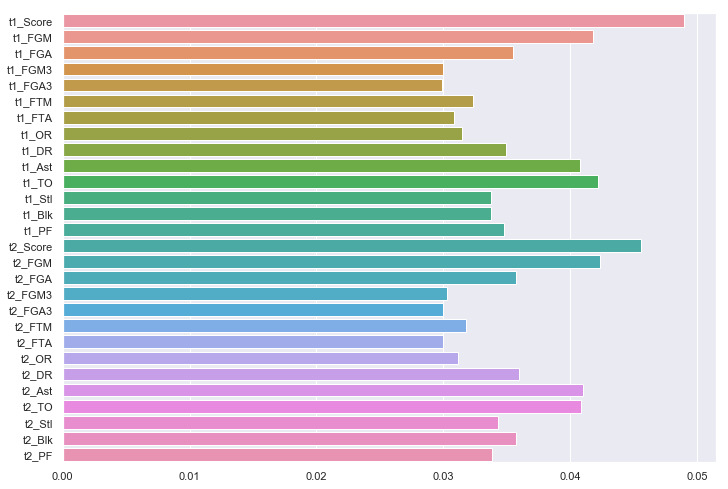

In [99]:
import seaborn as sns
%matplotlib inline
cols = ['t1_Score', 't1_FGM', 't1_FGA', 't1_FGM3', 't1_FGA3', 't1_FTM', 't1_FTA', 't1_OR', 't1_DR', 't1_Ast', 't1_TO', 't1_Stl', 't1_Blk', 't1_PF', 't2_Score', 't2_FGM', 't2_FGA', 't2_FGM3', 't2_FGA3', 't2_FTM', 't2_FTA', 't2_OR', 't2_DR', 't2_Ast', 't2_TO', 't2_Stl', 't2_Blk', 't2_PF']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=fi, y=cols)

In [91]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=9)
clf.fit(X_train, y_train)
nn_predicts = clf.predict(X_test)
accuracy_score(y_test, nn_predicts)

0.6689825830398782

In [100]:
from sklearn import preprocessing
scaled = [preprocessing.scale(x) for x in [X_train, X_test, y_train, y_test]]

In [104]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(scaled[0],y_train)
prediction = lr_model.predict(scaled[1])
accuracy_score(y_test,prediction)

/Users/admin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6708860759493671